## Домашнее задание №3
### 3.1 В алгоритме Policy Iteration важным гиперпараметром является gamma. Требуется ответить на вопрос, какой gamma лучше выбирать. Качество обученной политики можно оценивать например запуская среду 1000 раз и взяв после этого средний total_reward.

In [1]:
from IterationPolicy import IterationPolicy
from IterationValue import IterationValue
from IterationPolicy import eval_policy
from Frozen_Lake import FrozenLakeEnv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
env = FrozenLakeEnv()
mean_reward_08 = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.8, 100, 100, 0.0005).fit())
mean_reward_09 = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.9, 100, 100, 0.0005).fit())
mean_reward_099 = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.99, 100, 100, 0.0005).fit())
mean_reward_09999 = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.9999, 100, 100, 0.0005).fit())

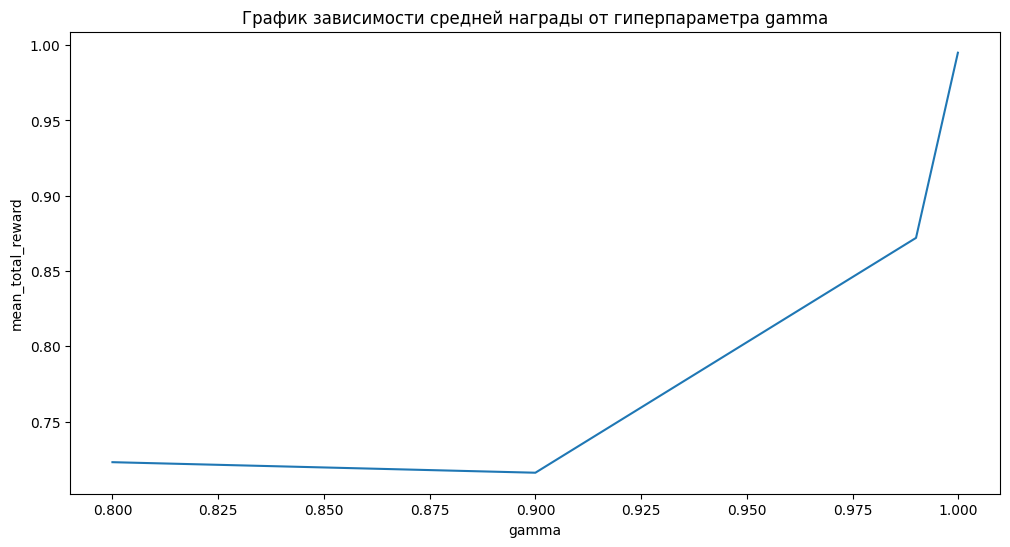

In [5]:
plt.figure(figsize=(12,6))
plt.plot([0.8, 0.9, 0.99, 0.9999], [mean_reward_08, mean_reward_09, mean_reward_099, mean_reward_09999])
plt.title('График зависимости средней награды от гиперпараметра gamma')
plt.xlabel('gamma')
plt.ylabel('mean_total_reward')
plt.show()

### Выводы по заданию 1:
Поскольку среда никак не наказывает за количество шагов, при большем значении gamma алгоритм подстраивается минимизировать вероятность попадания в запретные зоны не обращая внимания на количество шагов, поэтому в зависимости от дисконтирующего коэффициента так сильно зависит результирующая политика, получаемая алгоритмом.

### 3.2 На шаге Policy Evaluation мы каждый раз начинаем с нулевых values. А что будет если вместо этого начинать с values обученных на предыдущем шаге? Будет ли алгоритм работать? Если да, то будет ли он работать лучше? 

In [6]:
mean_reward_08_true = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.8, 100, 100, 0.0005, True).fit())
mean_reward_09_true = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.9, 100, 100, 0.0005, True).fit())
mean_reward_099_true = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.99, 100, 100, 0.0005, True).fit())
mean_reward_09999_true = eval_policy(env, n=1000, policy=IterationPolicy(env, 0.9999, 100, 100, 0.0005, True).fit())

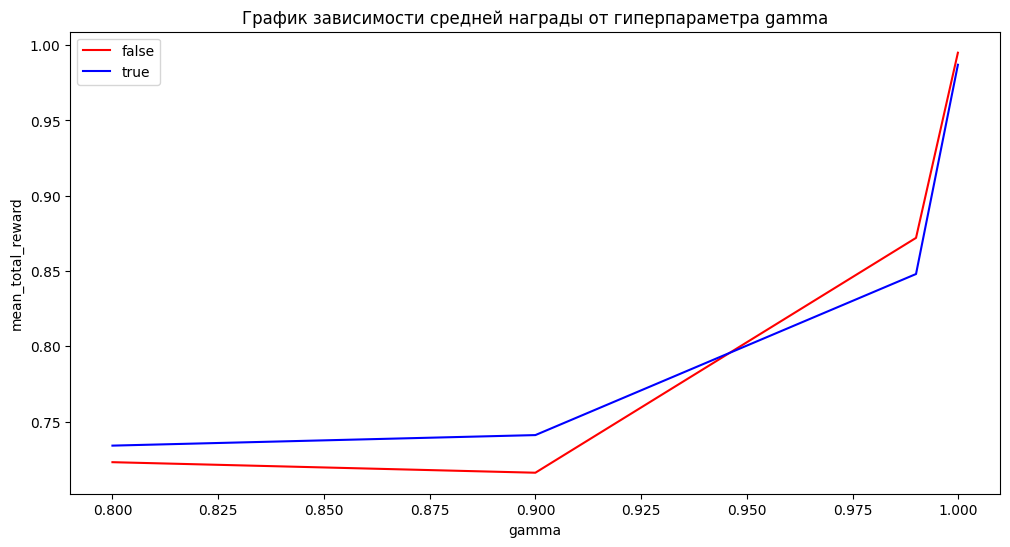

In [7]:
plt.figure(figsize=(12,6))
plt.plot([0.8, 0.9, 0.99, 0.9999], [mean_reward_08, mean_reward_09, mean_reward_099, mean_reward_09999], 'r', label='false')
plt.plot([0.8, 0.9, 0.99, 0.9999], [mean_reward_08_true, mean_reward_09_true, mean_reward_099_true, mean_reward_09999_true], 'b', label='true')
plt.title('График зависимости средней награды от гиперпараметра gamma')
plt.xlabel('gamma')
plt.ylabel('mean_total_reward')
plt.legend()
plt.show()

### Выводы по заданию 2:
Алгоритм работает при старте с values обученных на предыдущем шаге. Возможно при сохранении value можно уменьшить количество шагов при получении values при оценки политики, но экспериментально достоверных данных подтверждающих эту теорию нет.

### 3.3 Написать Value Iteriation. Исследовать гиперпараметры (в том числе gamma). Cравнить с Policy Iteration. Поскольку в Policy Iteration есть еще внутренний цикл, то адекватным сравнением алгоритмов будет не графики их результативности относительно внешнего цикла, а графики относительно, например, количества обращения к среде. 

In [8]:
env = FrozenLakeEnv()
iteration_value = IterationValue(env, 0.9999, 0.001, 100)
mean_reward_value_iteration = eval_policy(env, n=1000, policy=iteration_value.fit())
print(f'IterationValue mean_reward {mean_reward_value_iteration}, env_n {iteration_value.n_env}')

IterationValue mean_reward 0.967, env_n 22986


In [11]:
env = FrozenLakeEnv()
iteration_policy = IterationPolicy(env, 0.9999, 100, 7, 0.0005)
mean_reward_policy_iteration = eval_policy(env, n=1000, policy=iteration_policy.fit())
print(f'IterationPolicy mean_reward {mean_reward_policy_iteration}, env_n {iteration_policy.n_env}')

IterationPolicy mean_reward 0.984, env_n 44308


### Выводы по заданию 3:
В целях проведения корректного сравнения в алгоритм итераций по значению добавлен критерий останова при изменении значений меньше чем eps, а в алгоритм итераций по политике аналогичный критерий останова оценки политики. Критерий останова по подбору политики определить не удалось, поскольку критерий не изменяющейся политики не подошел (сходится до достижения приемлимого уровня качества). Также добавлен код по оценки количества обращений к среде и в итоге при одинаковом качестве (в рамках стохастики среды) для данной среды практически вдвое меньше обращений к среде у алгоритма итераций по значению.